# Post Processing

In [ ]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from coffea import hist, util
from coffea.processor import accumulate
from plots.helpers import makePlot2
from yahist import Hist1D, Hist2D

## Import Histograms

In [ ]:
scaled_output = accumulate(
    [
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_other_scaled_run20220301_103557.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_W_scaled_run20220303_131027.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_QCD_scaled_run20220302_210911.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_Z_scaled_run20220304_085914.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_TT_scaled_run20220301_195444.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_signal_scaled_run20220301_213000.coffea"),
    ]
)

In [ ]:
scaled_output_delphes = accumulate(
    [
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_Z_scaled_run20220311_105017_delphes.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_W_scaled_run20220312_070152_delphes.coffea"),
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_signal_scaled_run20220314_131939_delphes.coffea"),
    ]
)

# Data Cards

In [ ]:
MT_vs_sdmass = {
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_750_MH2_1250_MHC_1250': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_750_MH2_1600_MHC_1600': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_750_MH2_1900_MHC_1900': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_750_MH2_2250_MHC_2250': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_750_MH4_250_MH2_750_MHC_750':    {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_250_MH2_1000_MHC_1000': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_250_MH2_1250_MHC_1250': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_250_MH2_1500_MHC_1500': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_250_MH2_1600_MHC_1600': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_250_MH2_1750_MHC_1750': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_250_MH2_2000_MHC_2000': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_250_MH2_2250_MHC_2250': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_500_MH2_1000_MHC_1000': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_500_MH2_1250_MHC_1250': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_500_MH2_1500_MHC_1500': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_500_MH2_1600_MHC_1600': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_500_MH2_1750_MHC_1750': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_500_MH2_1900_MHC_1900': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_500_MH2_2000_MHC_2000': {},
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250': {},
    'ZJetsToNuNu_HT':        {},
    #'TT':        {},
    'WJetsToLNu':        {},
    #'QCD_bEnriched_HT':        {},
    #'other': {},
}

signals = {}
for sample in MT_vs_sdmass:
    if sample not in ['ZJetsToNuNu_HT', 'TT','WJetsToLNu','QCD_bEnriched_HT','other',]:
        signals[sample] = {}

variations = [
    '',
    '_up',
    '_down',
    '_0b_up',
    '_0b_down',
    '_1b_up',
    '_1b_down',
    '_2b_up',
    '_2b_down',
    '_1h_up',
    '_1h_down',
    '_jmr',
]

JES_unc_up = {}
JES_unc_down = {}

b0_unc_up = {}
b0_unc_down = {}

b1_unc_up = {}
b1_unc_down = {}

b2_unc_up = {}
b2_unc_down = {}

h1_unc_up = {}
h1_unc_down = {}

JMS_JMR_unc_up = {}
JMS_JMR_unc_down = {}

alpha_S_unc_up = {}
alpha_S_unc_down = {}

pdf_unc_up = {}
pdf_unc_down = {}

scale_unc_up = {}
scale_unc_down = {}

In [ ]:
for sample in MT_vs_sdmass:
    for var in variations:
        MT_vs_sdmass[sample][var] = Hist2D.from_bincounts(
            scaled_output_delphes['MT_vs_sdmass'+var].values(overflow='over')[(sample,)].T,
            (scaled_output_delphes['MT_vs_sdmass'+var].axis('mt').edges(overflow='over'), scaled_output_delphes['MT_vs_sdmass'+var].axis('mass').edges(overflow='over')),
            errors = np.sqrt(scaled_output_delphes['MT_vs_sdmass'+var].values(sumw2=True, overflow='over')[(sample,)][1].T),
        )
        for b in range(0,4):
            for j in range(0,10):
                if round(MT_vs_sdmass[sample][var].counts[b][j], 3) == 0:
                    MT_vs_sdmass[sample][var].counts[b][j] = 0.01
                if round(MT_vs_sdmass[sample][var].errors[b][j], 3) == 0:
                    MT_vs_sdmass[sample][var].errors[b][j] = 0.01
                    
                        
    JES_unc_up[sample]       = MT_vs_sdmass[sample]['_up'].counts/MT_vs_sdmass[sample][''].counts
    JES_unc_down[sample]     = MT_vs_sdmass[sample]['_down'].counts/MT_vs_sdmass[sample][''].counts
    b0_unc_up[sample]        = MT_vs_sdmass[sample]['_0b_up'].counts/MT_vs_sdmass[sample][''].counts
    b0_unc_down[sample]      = MT_vs_sdmass[sample]['_0b_down'].counts/MT_vs_sdmass[sample][''].counts
    b1_unc_up[sample]        = MT_vs_sdmass[sample]['_1b_up'].counts/MT_vs_sdmass[sample][''].counts
    b1_unc_down[sample]      = MT_vs_sdmass[sample]['_1b_down'].counts/MT_vs_sdmass[sample][''].counts
    b2_unc_up[sample]        = MT_vs_sdmass[sample]['_2b_up'].counts/MT_vs_sdmass[sample][''].counts
    b2_unc_down[sample]      = MT_vs_sdmass[sample]['_2b_down'].counts/MT_vs_sdmass[sample][''].counts
    h1_unc_up[sample]        = MT_vs_sdmass[sample]['_1h_up'].counts/MT_vs_sdmass[sample][''].counts
    h1_unc_down[sample]      = MT_vs_sdmass[sample]['_1h_down'].counts/MT_vs_sdmass[sample][''].counts
    JMS_JMR_unc_up[sample]   = 1+(MT_vs_sdmass[sample]['_jmr']-MT_vs_sdmass[sample]['']).counts/MT_vs_sdmass[sample][''].counts
    JMS_JMR_unc_down[sample] = 1-(MT_vs_sdmass[sample]['_jmr']-MT_vs_sdmass[sample]['']).counts/MT_vs_sdmass[sample][''].counts    

In [ ]:
for sample in signals:
    for lhe in np.concatenate((np.array([5, 10, 15, 20, 30, 40], dtype=np.int32), np.linspace(47,149,103, dtype=np.int32))):
        MT_vs_sdmass[sample][str(lhe)] = Hist2D.from_bincounts(
            scaled_output_delphes['MT_vs_sdmass_LHE'].values(overflow='over')[(sample,str(lhe))].T,
            (scaled_output_delphes['MT_vs_sdmass_LHE'].axis('mt').edges(overflow='over'), scaled_output_delphes['MT_vs_sdmass_LHE'].axis('mass').edges(overflow='over')),
        )
        for b in range(0,4):
            for j in range(0,10):
                if round(MT_vs_sdmass[sample][str(lhe)].counts[b][j], 3) == 0:
                    MT_vs_sdmass[sample][str(lhe)].counts[b][j] = 0.01
    
    alpha_S_unc_up[sample]   = MT_vs_sdmass[sample]['149'].counts/MT_vs_sdmass[sample][''].counts
    alpha_S_unc_down[sample] = MT_vs_sdmass[sample]['148'].counts/MT_vs_sdmass[sample][''].counts
    pdf_unc_up[sample]       = 1+np.sqrt(np.sum(np.array([(MT_vs_sdmass[sample][str(i)].counts-MT_vs_sdmass[sample][''].counts)**2 for i in np.linspace(48,147,100, dtype=np.int32)]),axis=0))/MT_vs_sdmass[sample][''].counts
    pdf_unc_down[sample]     = 1-np.sqrt(np.sum(np.array([(MT_vs_sdmass[sample][str(i)].counts-MT_vs_sdmass[sample][''].counts)**2 for i in np.linspace(48,147,100, dtype=np.int32)]),axis=0))/MT_vs_sdmass[sample][''].counts
    scale_unc_up[sample]     = np.max(np.array([MT_vs_sdmass[sample][str(i)].counts/MT_vs_sdmass[sample][''].counts for i in np.array([5, 10, 15, 20, 30, 40], dtype=np.int32)]),axis=0)
    scale_unc_down[sample]   = np.min(np.array([MT_vs_sdmass[sample][str(i)].counts/MT_vs_sdmass[sample][''].counts for i in np.array([5, 10, 15, 20, 30, 40], dtype=np.int32)]),axis=0)

In [334]:
for lhe in np.concatenate((np.array([1, 2, 3, 4, 6, 8], dtype=np.int32), np.linspace(9,111,103, dtype=np.int32))):
    MT_vs_sdmass['ZJetsToNuNu_HT'][str(lhe)] = Hist2D.from_bincounts(
        scaled_output_delphes['MT_vs_sdmass_LHE'].values(overflow='over')[('ZJetsToNuNu_HT',str(lhe))].T,
        (scaled_output_delphes['MT_vs_sdmass_LHE'].axis('mt').edges(overflow='over'), scaled_output_delphes['MT_vs_sdmass_LHE'].axis('mass').edges(overflow='over')),
    )
    for b in range(0,4):
        for j in range(0,10):
            if round(MT_vs_sdmass['ZJetsToNuNu_HT'][str(lhe)].counts[b][j], 3) == 0:
                MT_vs_sdmass['ZJetsToNuNu_HT'][str(lhe)].counts[b][j] = 0.01

central = MT_vs_sdmass['ZJetsToNuNu_HT'][str(9)].counts/np.sum(MT_vs_sdmass['ZJetsToNuNu_HT'][str(9)].counts)*np.sum(MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts)
                
alpha_S_unc_up['ZJetsToNuNu_HT']   = MT_vs_sdmass['ZJetsToNuNu_HT'][str(111)].counts/central
alpha_S_unc_down['ZJetsToNuNu_HT'] = MT_vs_sdmass['ZJetsToNuNu_HT'][str(110)].counts/central
pdf_unc_up['ZJetsToNuNu_HT']       = 1+np.sqrt(np.sum(np.array([(MT_vs_sdmass['ZJetsToNuNu_HT'][str(i)].counts-central)**2 for i in np.linspace(10,109,100, dtype=np.int32)]),axis=0))/central
pdf_unc_down['ZJetsToNuNu_HT']     = 1-np.sqrt(np.sum(np.array([(MT_vs_sdmass['ZJetsToNuNu_HT'][str(i)].counts-central)**2 for i in np.linspace(10,109,100, dtype=np.int32)]),axis=0))/central
scale_unc_up['ZJetsToNuNu_HT']     = np.max(np.array([MT_vs_sdmass['ZJetsToNuNu_HT'][str(i)].counts/central for i in np.array([1, 2, 3, 4, 6, 8], dtype=np.int32)]),axis=0)
scale_unc_down['ZJetsToNuNu_HT']   = np.min(np.array([MT_vs_sdmass['ZJetsToNuNu_HT'][str(i)].counts/central for i in np.array([1, 2, 3, 4, 6, 8], dtype=np.int32)]),axis=0)

/home/users/ewallace/miniconda3/envs/coffeadev/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [ ]:
for lhe in np.concatenate((np.array([5, 10, 15, 20, 30, 40], dtype=np.int32), np.linspace(45,147,102, dtype=np.int32))):
    MT_vs_sdmass['WJetsToLNu'][str(lhe)] = Hist2D.from_bincounts(
        scaled_output_delphes['MT_vs_sdmass_LHE'].values(overflow='over')[('WJetsToLNu',str(lhe))].T,
        (scaled_output_delphes['MT_vs_sdmass_LHE'].axis('mt').edges(overflow='over'), scaled_output_delphes['MT_vs_sdmass_LHE'].axis('mass').edges(overflow='over')),
    )
    for b in range(0,4):
        for j in range(0,10):
            if round(MT_vs_sdmass['WJetsToLNu'][str(lhe)].counts[b][j], 3) == 0:
                MT_vs_sdmass['WJetsToLNu'][str(lhe)].counts[b][j] = 0.01

alpha_S_unc_up['WJetsToLNu']   = MT_vs_sdmass['WJetsToLNu']['147'].counts/MT_vs_sdmass['WJetsToLNu'][''].counts
alpha_S_unc_down['WJetsToLNu'] = MT_vs_sdmass['WJetsToLNu']['146'].counts/MT_vs_sdmass['WJetsToLNu'][''].counts
pdf_unc_up['WJetsToLNu']       = 1+np.sqrt(np.sum(np.array([(MT_vs_sdmass['WJetsToLNu'][str(i)].counts-MT_vs_sdmass['WJetsToLNu'][''].counts)**2 for i in np.linspace(46,145,100, dtype=np.int32)]),axis=0))/MT_vs_sdmass['WJetsToLNu'][''].counts
pdf_unc_down['WJetsToLNu']     = 1-np.sqrt(np.sum(np.array([(MT_vs_sdmass['WJetsToLNu'][str(i)].counts-MT_vs_sdmass['WJetsToLNu'][''].counts)**2 for i in np.linspace(46,145,100, dtype=np.int32)]),axis=0))/MT_vs_sdmass['WJetsToLNu'][''].counts
scale_unc_up['WJetsToLNu']     = np.max(np.array([MT_vs_sdmass['WJetsToLNu'][str(i)].counts/MT_vs_sdmass['WJetsToLNu'][''].counts for i in np.array([5, 10, 15, 20, 30, 40], dtype=np.int32)]),axis=0)
scale_unc_down['WJetsToLNu']   = np.min(np.array([MT_vs_sdmass['WJetsToLNu'][str(i)].counts/MT_vs_sdmass['WJetsToLNu'][''].counts for i in np.array([5, 10, 15, 20, 30, 40], dtype=np.int32)]),axis=0)

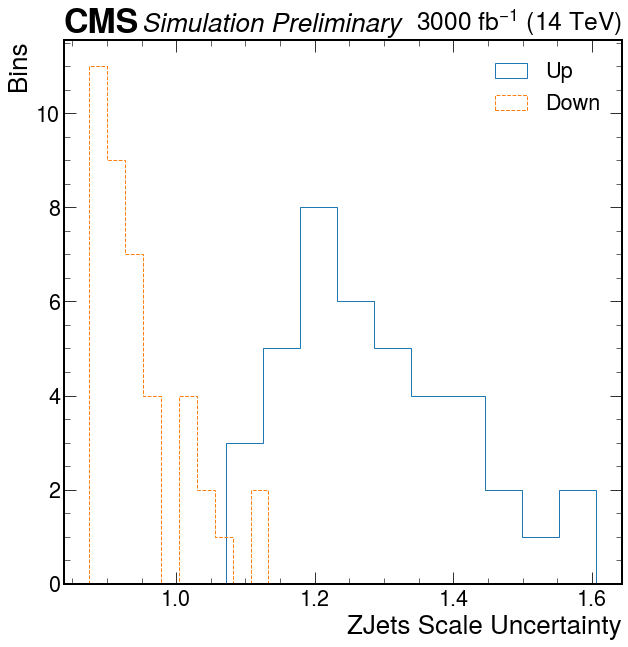

In [335]:
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

plt.hist(ak.flatten(scale_unc_up['ZJetsToNuNu_HT']),  histtype='step', linestyle='-', label='Up')
plt.hist(ak.flatten(scale_unc_down['ZJetsToNuNu_HT']),  histtype='step', linestyle='--', label='Down')
plt.xlabel('ZJets Scale Uncertainty')
plt.ylabel('Bins')
plt.legend()

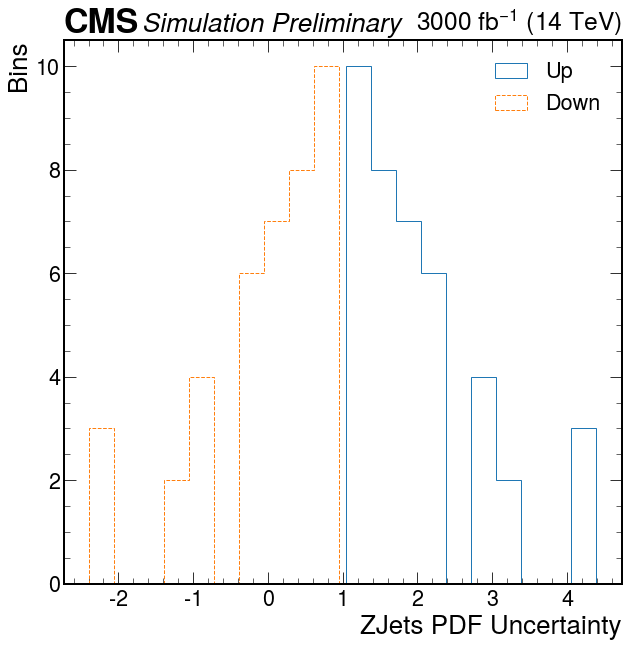

In [337]:
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )
#
#
plt.hist(ak.flatten(pdf_unc_up['ZJetsToNuNu_HT']), histtype='step', linestyle='-', label='Up', )
plt.hist(ak.flatten(pdf_unc_down['ZJetsToNuNu_HT']), histtype='step', linestyle='--', label='Down')
plt.xlabel('ZJets PDF Uncertainty')
plt.ylabel('Bins')
plt.legend()

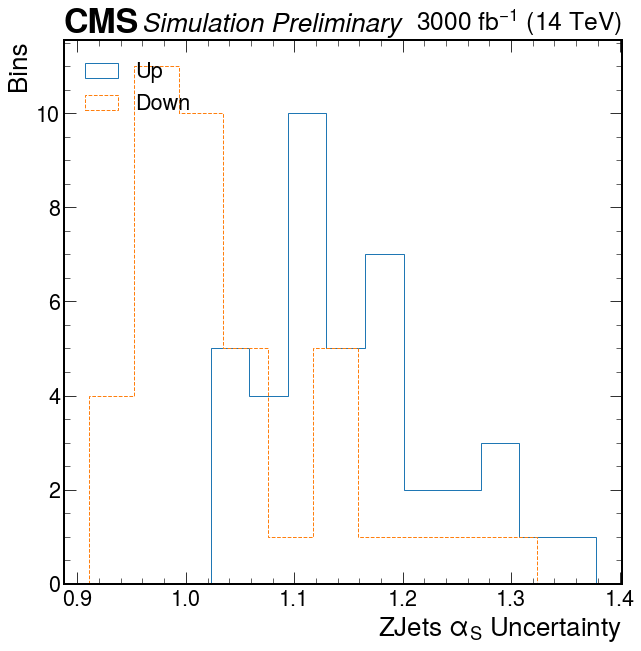

In [338]:
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

plt.hist(ak.flatten(alpha_S_unc_up['ZJetsToNuNu_HT']),  histtype='step', linestyle='-', label='Up')
plt.hist(ak.flatten(alpha_S_unc_down['ZJetsToNuNu_HT']), histtype='step', linestyle='--', label='Down')
plt.xlabel(r'ZJets $\alpha_S$ Uncertainty')
plt.ylabel('Bins')
plt.legend()

# 4 bin test

In [ ]:
MT_vs_sdmass2 = {
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_750_MH2_1250_MHC_1250': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_750_MH2_1600_MHC_1600': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_750_MH2_1900_MHC_1900': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_750_MH2_2250_MHC_2250': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_750_MH4_250_MH2_750_MHC_750':    {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_250_MH2_1000_MHC_1000': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_250_MH2_1250_MHC_1250': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_250_MH2_1500_MHC_1500': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_250_MH2_1600_MHC_1600': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_250_MH2_1750_MHC_1750': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_250_MH2_2000_MHC_2000': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_250_MH2_2250_MHC_2250': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_500_MH2_1000_MHC_1000': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_500_MH2_1250_MHC_1250': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_500_MH2_1500_MHC_1500': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_500_MH2_1600_MHC_1600': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_500_MH2_1750_MHC_1750': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_500_MH2_1900_MHC_1900': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_500_MH2_2000_MHC_2000': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250': {},
    'ZJetsToNuNu_HT':        {},
    'TT':        {},
    'WJetsToLNu':        {},
    'QCD_bEnriched_HT':        {},
    'other': {},
}
JES_unc2 = {}

b0_unc2 = {}

b1_unc2 = {}

b2_unc2 = {}

h1_unc2 = {}

JMS_JMR_unc2 = {}

In [ ]:
for sample in MT_vs_sdmass2:
    for var in variations:
        MT_vs_sdmass2[sample][var] = Hist1D.from_bincounts(
        scaled_output['MT_vs_sdmass'+var].sum('mt', overflow='over').values(overflow='over')[(sample,)].T,
        (scaled_output['MT_vs_sdmass'+var].axis('mass').edges(overflow='over')),
        #errors = np.sqrt(scaled_output['MT_vs_sdmass'+var].sum('mt', overflow='over').values(sumw2=True, overflow='over')[(sample,)][1].T),
        )
        for b in range(0,4):
            if round(MT_vs_sdmass2[sample][var].counts[b], 3) == 0:
                MT_vs_sdmass2[sample][var].counts[b] = 0.01
                    
    JES_unc2[sample]     = abs((MT_vs_sdmass2[sample]['_up']-MT_vs_sdmass2[sample]['_down']).counts)/(2*MT_vs_sdmass2[sample][''].counts)+1
    b0_unc2[sample]      = abs((MT_vs_sdmass2[sample]['_0b_up']-MT_vs_sdmass2[sample]['_0b_down']).counts)/(2*MT_vs_sdmass2[sample][''].counts)+1
    b1_unc2[sample]      = abs((MT_vs_sdmass2[sample]['_1b_up']-MT_vs_sdmass2[sample]['_1b_down']).counts)/(2*MT_vs_sdmass2[sample][''].counts)+1
    b2_unc2[sample]      = abs((MT_vs_sdmass2[sample]['_2b_up']-MT_vs_sdmass2[sample]['_2b_down']).counts)/(2*MT_vs_sdmass2[sample][''].counts)+1
    h1_unc2[sample]      = abs((MT_vs_sdmass2[sample]['_1h_up']-MT_vs_sdmass2[sample]['_1h_down']).counts)/(2*MT_vs_sdmass2[sample][''].counts)+1
    JMS_JMR_unc2[sample] = abs((MT_vs_sdmass2[sample]['_jmr']-MT_vs_sdmass2[sample]['']).counts)/(MT_vs_sdmass2[sample][''].counts)+1

In [ ]:
central = scaled_output['MT_vs_sdmass']['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000'].sum('dataset').values()[()]
unc = np.zeros_like(central)
for i in range(363, 463):
    variation = scaled_output['MT_vs_sdmass_LHE'][('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000',str(i))].sum('dataset').sum('variation').values()[()]
    unc += (central - variation)**2

np.sqrt(unc)/central

In [ ]:
alpha_S_unc

In [ ]:
pdf_unc

In [ ]:
shape_unc

## datacards

In [ ]:
def limit_range(val):
    return max(0.85, min(val, 1.15))

In [ ]:
from tools.dataCard import dataCard

for signal in signals:
    c = dataCard()
    c.setPrecision(3)

    c.addUncertainty('lumi',        'lnN')
    c.addUncertainty('signal_unc', 'lnN')
    c.addUncertainty('QCD_unc', 'lnN')
    c.addUncertainty('Wjets_unc', 'lnN')
    c.addUncertainty('Zinv_unc', 'lnN')
    c.addUncertainty('tt_unc', 'lnN')
    c.addUncertainty('other_unc', 'lnN')
    c.addUncertainty('JES',        'lnN')
    c.addUncertainty('JMS_JMR',    'lnN')
    c.addUncertainty('0b',         'lnN')
    c.addUncertainty('1b',         'lnN')
    c.addUncertainty('2b',         'lnN')
    c.addUncertainty('1h',         'lnN')

    binnum = 0

    for b in range(0,4):
        col = range(0,10)
        for j in col:
            binname = 'bin'+str(binnum)
            Binname = str(b+1)+'_'+str(j+1)
            binnum += 1
            c.addBin(binname, ['other', 'Wjets', 'QCD', 'tt', 'Zjets'], Binname) # signal is automatically added
            
            #processes = {
            #'signal': MT_vs_sdmass[str(signal)][''],
            #'QCD': MT_vs_sdmass['QCD_bEnriched_HT'][''],
            #'Wjets': MT_vs_sdmass['WJetsToLNu'][''],
            #'tt': MT_vs_sdmass['TT'][''],
            #'Zjets': MT_vs_sdmass['ZJetsToNuNu_HT'][''],
            #'other': MT_vs_sdmass['other'][''],
            #}
            
            #for process in processes:
            #    uname = 'Stat_'+binname+'_'+process
            #    c.addUncertainty(uname, 'lnN')
            #    c.specifyUncertainty(uname, binname, process, round(1+processes[process].errors[b][j]/processes[process].counts[b][j], 3))
            
            c.specifyExpectation(binname, 'signal',  round(MT_vs_sdmass[signal][''].counts[b][j], 3))
            c.specifyExpectation(binname, 'QCD',    round(MT_vs_sdmass['QCD_bEnriched_HT'][''].counts[b][j], 3))
            c.specifyExpectation(binname, 'Wjets',    round(MT_vs_sdmass['WJetsToLNu'][''].counts[b][j], 3))
            c.specifyExpectation(binname, 'other',    round(MT_vs_sdmass['other'][''].counts[b][j], 3))
            c.specifyExpectation(binname, 'tt',    round(MT_vs_sdmass['TT'][''].counts[b][j], 3))
            c.specifyExpectation(binname, 'Zjets',    round(MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts[b][j], 3))

            c.specifyUncertainty('signal_unc', binname, 'signal', 1.20)
            c.specifyUncertainty('QCD_unc',    binname, 'QCD',   1.50)
            c.specifyUncertainty('Wjets_unc',    binname, 'Wjets',   1.25)
            c.specifyUncertainty('Zinv_unc',   binname, 'Zjets',   1.25)
            c.specifyUncertainty('tt_unc',   binname, 'tt',   1.25)
            c.specifyUncertainty('other_unc',   binname, 'other',   1.25)

            c.specifyUncertainty('JES', binname, 'signal', (limit_range(JES_unc_down[signal][b][j]), limit_range(JES_unc_up[signal][b][j])))
            c.specifyUncertainty('JES', binname, 'QCD',   (limit_range(JES_unc_down['QCD_bEnriched_HT'][b][j]), limit_range(JES_unc_up['QCD_bEnriched_HT'][b][j])))
            c.specifyUncertainty('JES', binname, 'Wjets',   (limit_range(JES_unc_down['WJetsToLNu'][b][j]), limit_range(JES_unc_up['WJetsToLNu'][b][j])))
            c.specifyUncertainty('JES', binname, 'tt',  (limit_range(JES_unc_down['TT'][b][j]), limit_range(JES_unc_up['TT'][b][j])))
            c.specifyUncertainty('JES', binname, 'Zjets',  (limit_range(JES_unc_down['ZJetsToNuNu_HT'][b][j]), limit_range(JES_unc_up['ZJetsToNuNu_HT'][b][j])))
            c.specifyUncertainty('JES', binname, 'other',  (limit_range(JES_unc_down['other'][b][j]), limit_range(JES_unc_up['other'][b][j])))
            
            c.specifyUncertainty('JMS_JMR', binname, 'signal', (limit_range(JMS_JMR_unc_down[signal][b][j]), limit_range(JMS_JMR_unc_up[signal][b][j])))
            c.specifyUncertainty('JMS_JMR', binname, 'QCD',   (limit_range(JMS_JMR_unc_down['QCD_bEnriched_HT'][b][j]), limit_range(JMS_JMR_unc_up['QCD_bEnriched_HT'][b][j])))
            c.specifyUncertainty('JMS_JMR', binname, 'Wjets',   (limit_range(JMS_JMR_unc_down['WJetsToLNu'][b][j]), limit_range(JMS_JMR_unc_up['WJetsToLNu'][b][j])))
            c.specifyUncertainty('JMS_JMR', binname, 'tt',  (limit_range(JMS_JMR_unc_down['TT'][b][j]), limit_range(JMS_JMR_unc_up['TT'][b][j])))
            c.specifyUncertainty('JMS_JMR', binname, 'Zjets',  (limit_range(JMS_JMR_unc_down['ZJetsToNuNu_HT'][b][j]), limit_range(JMS_JMR_unc_up['ZJetsToNuNu_HT'][b][j])))
            c.specifyUncertainty('JMS_JMR', binname, 'other',  (limit_range(JMS_JMR_unc_down['other'][b][j]), limit_range(JMS_JMR_unc_up['other'][b][j])))

            c.specifyUncertainty('0b', binname, 'signal', (b0_unc_down[signal][b][j], b0_unc_up[signal][b][j]))
            c.specifyUncertainty('0b', binname, 'QCD',   (b0_unc_down['QCD_bEnriched_HT'][b][j], b0_unc_up['QCD_bEnriched_HT'][b][j]))
            c.specifyUncertainty('0b', binname, 'Wjets',   (b0_unc_down['WJetsToLNu'][b][j], b0_unc_up['WJetsToLNu'][b][j]))
            c.specifyUncertainty('0b', binname, 'tt',  (b0_unc_down['TT'][b][j], b0_unc_up['TT'][b][j]))
            c.specifyUncertainty('0b', binname, 'Zjets',  (b0_unc_down['ZJetsToNuNu_HT'][b][j], b0_unc_up['ZJetsToNuNu_HT'][b][j]))
            c.specifyUncertainty('0b', binname, 'other',  (b0_unc_down['other'][b][j], b0_unc_up['other'][b][j]))

            c.specifyUncertainty('1b', binname, 'signal', (b1_unc_down[signal][b][j], b1_unc_up[signal][b][j]))
            c.specifyUncertainty('1b', binname, 'QCD',   (b1_unc_down['QCD_bEnriched_HT'][b][j], b1_unc_up['QCD_bEnriched_HT'][b][j]))
            c.specifyUncertainty('1b', binname, 'Wjets',   (b1_unc_down['WJetsToLNu'][b][j], b1_unc_up['WJetsToLNu'][b][j]))
            c.specifyUncertainty('1b', binname, 'tt',  (b1_unc_down['TT'][b][j], b1_unc_up['TT'][b][j]))
            c.specifyUncertainty('1b', binname, 'Zjets',  (b1_unc_down['ZJetsToNuNu_HT'][b][j], b1_unc_up['ZJetsToNuNu_HT'][b][j]))
            c.specifyUncertainty('1b', binname, 'other',  (b1_unc_down['other'][b][j], b1_unc_up['other'][b][j]))

            c.specifyUncertainty('2b', binname, 'signal', (b2_unc_down[signal][b][j], b2_unc_up[signal][b][j]))
            c.specifyUncertainty('2b', binname, 'QCD',   (b2_unc_down['QCD_bEnriched_HT'][b][j], b2_unc_up['QCD_bEnriched_HT'][b][j]))
            c.specifyUncertainty('2b', binname, 'Wjets',   (b2_unc_down['WJetsToLNu'][b][j], b2_unc_up['WJetsToLNu'][b][j]))
            c.specifyUncertainty('2b', binname, 'tt',  (b2_unc_down['TT'][b][j], b2_unc_up['TT'][b][j]))
            c.specifyUncertainty('2b', binname, 'Zjets',  (b2_unc_down['ZJetsToNuNu_HT'][b][j], b2_unc_up['ZJetsToNuNu_HT'][b][j]))
            c.specifyUncertainty('2b', binname, 'other',  (b2_unc_down['other'][b][j], b2_unc_up['other'][b][j]))

            c.specifyUncertainty('1h', binname, 'signal', (h1_unc_down[signal][b][j], h1_unc_up[signal][b][j]))
            c.specifyUncertainty('1h', binname, 'other', (h1_unc_down['other'][b][j], h1_unc_up['other'][b][j]))

            c.specifyObservation(binname, round(MT_vs_sdmass['QCD_bEnriched_HT'][''].counts[b][j] +
                                                MT_vs_sdmass['WJetsToLNu'][''].counts[b][j] +
                                                MT_vs_sdmass['TT'][''].counts[b][j] +
                                                MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts[b][j]+
                                                MT_vs_sdmass['other'][''].counts[b][j], 3))

    c.specifyFlatUncertainty('lumi', 1.01)
    c.writeToFile('Data_Cards/'+str(signal)+'_8.txt')

In [ ]:
from tools.dataCard import dataCard

c = dataCard()
c.setPrecision(3)

c.addUncertainty('lumi',        'lnN')
c.addUncertainty('signal_unc', 'lnN')
c.addUncertainty('QCD_unc', 'lnN')
c.addUncertainty('Wjets_unc', 'lnN')
c.addUncertainty('Zinv_unc', 'lnN')
c.addUncertainty('tt_unc', 'lnN')
c.addUncertainty('other_unc', 'lnN')
c.addUncertainty('JES',        'lnN')
c.addUncertainty('JMS_JMR',    'lnN')
c.addUncertainty('0b',         'lnN')
c.addUncertainty('1b',         'lnN')
c.addUncertainty('2b',         'lnN')
c.addUncertainty('1h',         'lnN')

binnum = 0

for b in range(0,4):
    for j in range(0,10):
        binname = 'bin'+str(binnum)
        Binname = str(b+1)+'_'+str(j+1)
        binnum += 1
        c.addBin(binname, ['other', 'Wjets', 'QCD', 'tt', 'Zjets'], Binname) # signal is automatically added
        
        processes = {
            'signal': MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][''],
            'QCD': MT_vs_sdmass['QCD_bEnriched_HT'][''],
            'Wjets': MT_vs_sdmass['WJetsToLNu'][''],
            'tt': MT_vs_sdmass['TT'][''],
            'Zjets': MT_vs_sdmass['ZJetsToNuNu_HT'][''],
            'other': MT_vs_sdmass['other'][''],
        }
        for process in processes:
            uname = 'Stat_'+binname+'_'+process
            c.addUncertainty(uname, 'lnN')
            c.specifyUncertainty(uname, binname, process, round(1+processes[process].errors[b][j]/processes[process].counts[b][j], 3))
        
        c.specifyExpectation(binname, 'signal',  round(MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][''].counts[b][j], 3))
        c.specifyExpectation(binname, 'QCD',    round(MT_vs_sdmass['QCD_bEnriched_HT'][''].counts[b][j], 3))
        c.specifyExpectation(binname, 'Wjets',    round(MT_vs_sdmass['WJetsToLNu'][''].counts[b][j], 3))
        c.specifyExpectation(binname, 'other',    round(MT_vs_sdmass['other'][''].counts[b][j], 3))
        c.specifyExpectation(binname, 'tt',    round(MT_vs_sdmass['TT'][''].counts[b][j], 3))
        c.specifyExpectation(binname, 'Zjets',    round(MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts[b][j], 3))

        c.specifyUncertainty('signal_unc', binname, 'signal', 1.20)
        c.specifyUncertainty('QCD_unc',    binname, 'QCD',   1.50)
        c.specifyUncertainty('Wjets_unc',    binname, 'Wjets',   1.25)
        c.specifyUncertainty('Zinv_unc',   binname, 'Zjets',   1.25)
        c.specifyUncertainty('tt_unc',   binname, 'tt',   1.25)
        c.specifyUncertainty('other_unc',   binname, 'other',   1.25)
        
        c.specifyUncertainty('JES', binname, 'signal', JES_unc['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][b][j])
        c.specifyUncertainty('JES', binname, 'QCD',   JES_unc['QCD_bEnriched_HT'][b][j])
        c.specifyUncertainty('JES', binname, 'Wjets',   JES_unc['WJetsToLNu'][b][j])
        c.specifyUncertainty('JES', binname, 'tt',  JES_unc['TT'][b][j])
        c.specifyUncertainty('JES', binname, 'Zjets',  JES_unc['ZJetsToNuNu_HT'][b][j])
        c.specifyUncertainty('JES', binname, 'other',  JES_unc['other'][b][j])
        
        c.specifyUncertainty('JMS_JMR', binname, 'signal', JMS_JMR_unc['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][b][j])
        c.specifyUncertainty('JMS_JMR', binname, 'QCD',   JMS_JMR_unc['QCD_bEnriched_HT'][b][j])
        c.specifyUncertainty('JMS_JMR', binname, 'Wjets',   JMS_JMR_unc['WJetsToLNu'][b][j])
        c.specifyUncertainty('JMS_JMR', binname, 'tt',  JMS_JMR_unc['TT'][b][j])
        c.specifyUncertainty('JMS_JMR', binname, 'Zjets',  JMS_JMR_unc['ZJetsToNuNu_HT'][b][j])
        c.specifyUncertainty('JMS_JMR', binname, 'other',  JMS_JMR_unc['other'][b][j])
        
        c.specifyUncertainty('0b', binname, 'signal', b0_unc['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][b][j])
        c.specifyUncertainty('0b', binname, 'QCD',   b0_unc['QCD_bEnriched_HT'][b][j])
        c.specifyUncertainty('0b', binname, 'Wjets',   b0_unc['WJetsToLNu'][b][j])
        c.specifyUncertainty('0b', binname, 'tt',  b0_unc['TT'][b][j])
        c.specifyUncertainty('0b', binname, 'Zjets',  b0_unc['ZJetsToNuNu_HT'][b][j])
        c.specifyUncertainty('0b', binname, 'other',  b0_unc['other'][b][j])
       
        c.specifyUncertainty('1b', binname, 'signal', b1_unc['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][b][j])
        c.specifyUncertainty('1b', binname, 'QCD',   b1_unc['QCD_bEnriched_HT'][b][j])
        c.specifyUncertainty('1b', binname, 'Wjets',   b1_unc['WJetsToLNu'][b][j])
        c.specifyUncertainty('1b', binname, 'tt',  b1_unc['TT'][b][j])
        c.specifyUncertainty('1b', binname, 'Zjets',  b1_unc['ZJetsToNuNu_HT'][b][j])
        c.specifyUncertainty('1b', binname, 'other',  b1_unc['other'][b][j])
        
        c.specifyUncertainty('2b', binname, 'signal', b2_unc['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][b][j])
        c.specifyUncertainty('2b', binname, 'QCD',   b2_unc['QCD_bEnriched_HT'][b][j])
        c.specifyUncertainty('2b', binname, 'Wjets',   b2_unc['WJetsToLNu'][b][j])
        c.specifyUncertainty('2b', binname, 'tt',  b2_unc['TT'][b][j])
        c.specifyUncertainty('2b', binname, 'Zjets',  b2_unc['ZJetsToNuNu_HT'][b][j])
        c.specifyUncertainty('2b', binname, 'other',  b2_unc['other'][b][j])
       
        c.specifyUncertainty('1h', binname, 'signal', h1_unc['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_500_MH2_2250_MHC_2250'][b][j])
        c.specifyUncertainty('1h', binname, 'other', h1_unc['other'][b][j])
        
        c.specifyObservation(binname, round(MT_vs_sdmass['QCD_bEnriched_HT'][''].counts[b][j] + MT_vs_sdmass['WJetsToLNu'][''].counts[b][j] + MT_vs_sdmass['TT'][''].counts[b][j] + MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts[b][j]++ MT_vs_sdmass['other'][''].counts[b][j], 3))

        
c.specifyFlatUncertainty('lumi', 1.01)
c.writeToFile('Data_Cards/2HDMa_2250_500_5.txt')

In [ ]:
from tools.dataCard import dataCard

c = dataCard()
c.setPrecision(3)

c.addUncertainty('lumi',        'lnN')
c.addUncertainty('signal_unc', 'lnN')
c.addUncertainty('QCD_unc', 'lnN')
c.addUncertainty('Wjets_unc', 'lnN')
c.addUncertainty('Zinv_unc', 'lnN')
c.addUncertainty('tt_unc', 'lnN')
c.addUncertainty('other_unc', 'lnN')
c.addUncertainty('JES',        'lnN')
c.addUncertainty('JMS_JMR',    'lnN')
c.addUncertainty('0b',         'lnN')
c.addUncertainty('1b',         'lnN')
c.addUncertainty('2b',         'lnN')
c.addUncertainty('1h',         'lnN')

binnum = 0

for b in range(0,4):
    binname = 'bin'+str(binnum)
    Binname = str(b+1)
    binnum += 1
    c.addBin(binname, ['other', 'Wjets', 'QCD', 'tt', 'Zjets'], Binname) # signal is automatically added
        
    #processes = {
    #    'signal': MT_vs_sdmass2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750'][''],
    #    'QCD': MT_vs_sdmass2['QCD_bEnriched_HT'][''],
    #    'Wjets': MT_vs_sdmass2['WJetsToLNu'][''],
    #    'tt': MT_vs_sdmass2['TT'][''],
    #    'Zjets': MT_vs_sdmass2['ZJetsToNuNu_HT'][''],
    #    'other': MT_vs_sdmass2['other'][''],
    #}
    #for process in processes:
    #    uname = 'Stat_'+binname+'_'+process
    #    c.addUncertainty(uname, 'lnN')
    #    c.specifyUncertainty(uname, binname, process, round(1+processes[process].errors[b]/processes[process].counts[b], 3))
        
    c.specifyExpectation(binname, 'signal',  round(MT_vs_sdmass2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][''].counts[b], 3))
    c.specifyExpectation(binname, 'QCD',    round(MT_vs_sdmass2['QCD_bEnriched_HT'][''].counts[b], 3))
    c.specifyExpectation(binname, 'Wjets',    round(MT_vs_sdmass2['WJetsToLNu'][''].counts[b], 3))
    c.specifyExpectation(binname, 'other',    round(MT_vs_sdmass2['other'][''].counts[b], 3))
    c.specifyExpectation(binname, 'tt',    round(MT_vs_sdmass2['TT'][''].counts[b], 3))
    c.specifyExpectation(binname, 'Zjets',    round(MT_vs_sdmass2['ZJetsToNuNu_HT'][''].counts[b], 3))

    c.specifyUncertainty('signal_unc', binname, 'signal', 1.20)
    c.specifyUncertainty('QCD_unc',    binname, 'QCD',   1.50)
    c.specifyUncertainty('Wjets_unc',    binname, 'Wjets',   1.25)
    c.specifyUncertainty('Zinv_unc',   binname, 'Zjets',   1.25)
    c.specifyUncertainty('tt_unc',   binname, 'tt',   1.25)
    c.specifyUncertainty('other_unc',   binname, 'other',   1.25)
        
    c.specifyUncertainty('JES', binname, 'signal', JES_unc2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][b])
    c.specifyUncertainty('JES', binname, 'QCD',   JES_unc2['QCD_bEnriched_HT'][b])
    c.specifyUncertainty('JES', binname, 'Wjets',   JES_unc2['WJetsToLNu'][b])
    c.specifyUncertainty('JES', binname, 'tt',  JES_unc2['TT'][b])
    c.specifyUncertainty('JES', binname, 'Zjets',  JES_unc2['ZJetsToNuNu_HT'][b])
    c.specifyUncertainty('JES', binname, 'other',  JES_unc2['other'][b])
        
    c.specifyUncertainty('JMS_JMR', binname, 'signal', JMS_JMR_unc2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][b])
    c.specifyUncertainty('JMS_JMR', binname, 'QCD',   JMS_JMR_unc2['QCD_bEnriched_HT'][b])
    c.specifyUncertainty('JMS_JMR', binname, 'Wjets',   JMS_JMR_unc2['WJetsToLNu'][b])
    c.specifyUncertainty('JMS_JMR', binname, 'tt',  JMS_JMR_unc2['TT'][b])
    c.specifyUncertainty('JMS_JMR', binname, 'Zjets',  JMS_JMR_unc2['ZJetsToNuNu_HT'][b])
    c.specifyUncertainty('JMS_JMR', binname, 'other',  JMS_JMR_unc2['other'][b])
        
    c.specifyUncertainty('0b', binname, 'signal', b0_unc2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][b])
    c.specifyUncertainty('0b', binname, 'QCD',   b0_unc2['QCD_bEnriched_HT'][b])
    c.specifyUncertainty('0b', binname, 'Wjets',   b0_unc2['WJetsToLNu'][b])
    c.specifyUncertainty('0b', binname, 'tt',  b0_unc2['TT'][b])
    c.specifyUncertainty('0b', binname, 'Zjets',  b0_unc2['ZJetsToNuNu_HT'][b])
    c.specifyUncertainty('0b', binname, 'other',  b0_unc2['other'][b])
       
    c.specifyUncertainty('1b', binname, 'signal', b1_unc2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][b])
    c.specifyUncertainty('1b', binname, 'QCD',   b1_unc2['QCD_bEnriched_HT'][b])
    c.specifyUncertainty('1b', binname, 'Wjets',   b1_unc2['WJetsToLNu'][b])
    c.specifyUncertainty('1b', binname, 'tt',  b1_unc2['TT'][b])
    c.specifyUncertainty('1b', binname, 'Zjets',  b1_unc2['ZJetsToNuNu_HT'][b])
    c.specifyUncertainty('1b', binname, 'other',  b1_unc2['other'][b])
        
    c.specifyUncertainty('2b', binname, 'signal', b2_unc2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][b])
    c.specifyUncertainty('2b', binname, 'QCD',   b2_unc2['QCD_bEnriched_HT'][b])
    c.specifyUncertainty('2b', binname, 'Wjets',   b2_unc2['WJetsToLNu'][b])
    c.specifyUncertainty('2b', binname, 'tt',  b2_unc2['TT'][b])
    c.specifyUncertainty('2b', binname, 'Zjets',  b2_unc2['ZJetsToNuNu_HT'][b])
    c.specifyUncertainty('2b', binname, 'other',  b2_unc2['other'][b])
       
    c.specifyUncertainty('1h', binname, 'signal', h1_unc2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][b])
    c.specifyUncertainty('1h', binname, 'other', h1_unc2['other'][b])
        
    c.specifyObservation(binname, round(MT_vs_sdmass2['QCD_bEnriched_HT'][''].counts[b] + MT_vs_sdmass2['WJetsToLNu'][''].counts[b] + MT_vs_sdmass2['TT'][''].counts[b] + MT_vs_sdmass2['ZJetsToNuNu_HT'][''].counts[b]++ MT_vs_sdmass2['other'][''].counts[b], 3))

        
c.specifyFlatUncertainty('lumi', 1.01)
c.writeToFile('Data_Cards/4_bin_1900_250.txt')

## Plotting Regions

In [ ]:
bin_array_signal = np.ones(40)
i=0
for row in MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][''].counts:
    for col in row:
        bin_array_signal[i] = col
        i+=1

In [ ]:
bin_array_signal_2 = np.ones(40)
i=0
for row in MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][''].counts:
    for col in row:
        bin_array_signal_2[i] = col
        i+=1

In [ ]:
bin_array_Z = np.ones(40)
i=0
for row in MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts:
    for col in row:
        bin_array_Z[i] = col
        i+=1

In [ ]:
bin_array_tt = np.ones(40)
i=0
for row in MT_vs_sdmass['TT'][''].counts:
    for col in row:
        bin_array_tt[i] = col
        i+=1

In [ ]:
bin_array_W = np.ones(40)
i=0
for row in MT_vs_sdmass['WJetsToLNu'][''].counts:
    for col in row:
        bin_array_W[i] = col
        i+=1

In [ ]:
bin_array_QCD = np.ones(40)
i=0
for row in MT_vs_sdmass['QCD_bEnriched_HT'][''].counts:
    for col in row:
        bin_array_QCD[i] = col
        i+=1

In [ ]:
bin_array_other = np.ones(40)
i=0
for row in MT_vs_sdmass['other'][''].counts:
    for col in row:
        bin_array_other[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other, bin_array_W, bin_array_tt, bin_array_QCD, bin_array_Z]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="fill",
    #density = True,
    stack=True,
    label=[label for label in labels],
    color=[color for color in colors],
    ax=ax
    )

hep.histplot(
    [bin_array_signal*10,bin_array_signal_2*10,],
    histtype="step",
    #density = True,
    stack=False,
    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
    color=['black', 'black'],
    linestyle=['-','--'],
    ax=ax
    )

ax.set_xlabel(r'$Bin$')
ax.set_ylabel(r'Events')
ax.set_yscale('log')
plt.ylim([1,50000])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'][''].counts[3][5]

In [ ]:
bin_array_signal2 = np.ones(4)
i=0
for row in MT_vs_sdmass2['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750'][''].counts:
    bin_array_signal2[i] = row
    i+=1

In [ ]:
bin_array_Z2 = np.ones(4)
i=0
for row in MT_vs_sdmass2['ZJetsToNuNu_HT'][''].counts:
    bin_array_Z2[i] = row
    i+=1

In [ ]:
bin_array_tt2 = np.ones(4)
i=0
for row in MT_vs_sdmass2['TT'][''].counts:
    bin_array_tt2[i] = row
    i+=1

In [ ]:
bin_array_W2 = np.ones(4)
i=0
for row in MT_vs_sdmass2['WJetsToLNu'][''].counts:
    bin_array_W2[i] = row
    i+=1

In [ ]:
bin_array_QCD2 = np.ones(4)
i=0
for row in MT_vs_sdmass2['QCD_bEnriched_HT'][''].counts:
    bin_array_QCD2[i] = row
    i+=1

In [ ]:
bin_array_other2 = np.ones(4)
i=0
for row in MT_vs_sdmass2['other'][''].counts:
    bin_array_other2[i] = row
    i+=1

In [ ]:
unrolled = [bin_array_other2, bin_array_W2, bin_array_tt2, bin_array_QCD2, bin_array_Z2]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="fill",
    #density = True,
    stack=True,
    label=[label for label in labels],
    color=[color for color in colors],
    ax=ax
    )

hep.histplot(
    [bin_array_signal2*10],
    histtype="step",
    #density = True,
    stack=False,
    label=[r'$m_A=1750, m_a=750\ (\times10)$'],
    color=['black'],
    linestyle=['-'],
    ax=ax
    )

ax.set_xlabel(r'$Bin$')
ax.set_ylabel(r'Events')
ax.set_yscale('log')
plt.ylim([1,50000])
ax.legend(prop={'size': 12})

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_Z_up = np.ones(40)
i=0
for row in JES_unc_up['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_up[i] = col
        i+=1
        
bin_array_Z_down = np.ones(40)
i=0
for row in JES_unc_down['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_down[i] = col
        i+=1
        
bin_array_tt_up = np.ones(40)
i=0
for row in JES_unc_up['TT']:
    for col in row:
        bin_array_tt_up[i] = col
        i+=1
        
bin_array_tt_down = np.ones(40)
i=0
for row in JES_unc_down['TT']:
    for col in row:
        bin_array_tt_down[i] = col
        i+=1

bin_array_W_up = np.ones(40)
i=0
for row in JES_unc_up['WJetsToLNu']:
    for col in row:
        bin_array_W_up[i] = col
        i+=1
        
bin_array_W_down = np.ones(40)
i=0
for row in JES_unc_down['WJetsToLNu']:
    for col in row:
        bin_array_W_down[i] = col
        i+=1
        
bin_array_QCD_up = np.ones(40)
i=0
for row in JES_unc_up['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_up[i] = col
        i+=1

bin_array_QCD_down = np.ones(40)
i=0
for row in JES_unc_down['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_down[i] = col
        i+=1
        
bin_array_other_up = np.ones(40)
i=0
for row in JES_unc_up['other']:
    for col in row:
        bin_array_other_up[i] = col
        i+=1
        
bin_array_other_down = np.ones(40)
i=0
for row in JES_unc_down['other']:
    for col in row:
        bin_array_other_down[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other_up, bin_array_W_up, bin_array_tt_up, bin_array_QCD_up, bin_array_Z_up,
            bin_array_other_down, bin_array_W_down, bin_array_tt_down, bin_array_QCD_down, bin_array_Z_down]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',
        r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',
        '#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    #density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','-','-','-','-','--','--','--','--','--',],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$JES\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
plt.ylim([0.5,1.5])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_Z_up = np.ones(40)
i=0
for row in b0_unc_up['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_up[i] = col
        i+=1
        
bin_array_Z_down = np.ones(40)
i=0
for row in b0_unc_down['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_down[i] = col
        i+=1
        
bin_array_tt_up = np.ones(40)
i=0
for row in b0_unc_up['TT']:
    for col in row:
        bin_array_tt_up[i] = col
        i+=1
        
bin_array_tt_down = np.ones(40)
i=0
for row in b0_unc_down['TT']:
    for col in row:
        bin_array_tt_down[i] = col
        i+=1

bin_array_W_up = np.ones(40)
i=0
for row in b0_unc_up['WJetsToLNu']:
    for col in row:
        bin_array_W_up[i] = col
        i+=1
        
bin_array_W_down = np.ones(40)
i=0
for row in b0_unc_down['WJetsToLNu']:
    for col in row:
        bin_array_W_down[i] = col
        i+=1
        
bin_array_QCD_up = np.ones(40)
i=0
for row in b0_unc_up['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_up[i] = col
        i+=1

bin_array_QCD_down = np.ones(40)
i=0
for row in b0_unc_down['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_down[i] = col
        i+=1
        
bin_array_other_up = np.ones(40)
i=0
for row in b0_unc_up['other']:
    for col in row:
        bin_array_other_up[i] = col
        i+=1
        
bin_array_other_down = np.ones(40)
i=0
for row in b0_unc_down['other']:
    for col in row:
        bin_array_other_down[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other_up, bin_array_W_up, bin_array_tt_up, bin_array_QCD_up, bin_array_Z_up,
            bin_array_other_down, bin_array_W_down, bin_array_tt_down, bin_array_QCD_down, bin_array_Z_down]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',
        r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',
        '#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    #density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','-','-','-','-','--','--','--','--','--',],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$0b\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
plt.ylim([0.8,1.2])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_Z_up = np.ones(40)
i=0
for row in b1_unc_up['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_up[i] = col
        i+=1
        
bin_array_Z_down = np.ones(40)
i=0
for row in b1_unc_down['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_down[i] = col
        i+=1
        
bin_array_tt_up = np.ones(40)
i=0
for row in b1_unc_up['TT']:
    for col in row:
        bin_array_tt_up[i] = col
        i+=1
        
bin_array_tt_down = np.ones(40)
i=0
for row in b1_unc_down['TT']:
    for col in row:
        bin_array_tt_down[i] = col
        i+=1

bin_array_W_up = np.ones(40)
i=0
for row in b1_unc_up['WJetsToLNu']:
    for col in row:
        bin_array_W_up[i] = col
        i+=1
        
bin_array_W_down = np.ones(40)
i=0
for row in b1_unc_down['WJetsToLNu']:
    for col in row:
        bin_array_W_down[i] = col
        i+=1
        
bin_array_QCD_up = np.ones(40)
i=0
for row in b1_unc_up['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_up[i] = col
        i+=1

bin_array_QCD_down = np.ones(40)
i=0
for row in b1_unc_down['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_down[i] = col
        i+=1
        
bin_array_other_up = np.ones(40)
i=0
for row in b1_unc_up['other']:
    for col in row:
        bin_array_other_up[i] = col
        i+=1
        
bin_array_other_down = np.ones(40)
i=0
for row in b1_unc_down['other']:
    for col in row:
        bin_array_other_down[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other_up, bin_array_W_up, bin_array_tt_up, bin_array_QCD_up, bin_array_Z_up,
            bin_array_other_down, bin_array_W_down, bin_array_tt_down, bin_array_QCD_down, bin_array_Z_down]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',
        r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',
        '#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    #density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','-','-','-','-','--','--','--','--','--',],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$1b\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
plt.ylim([0.85,1.15])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_Z_up = np.ones(40)
i=0
for row in b2_unc_up['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_up[i] = col
        i+=1
        
bin_array_Z_down = np.ones(40)
i=0
for row in b2_unc_down['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z_down[i] = col
        i+=1
        
bin_array_tt_up = np.ones(40)
i=0
for row in b2_unc_up['TT']:
    for col in row:
        bin_array_tt_up[i] = col
        i+=1
        
bin_array_tt_down = np.ones(40)
i=0
for row in b2_unc_down['TT']:
    for col in row:
        bin_array_tt_down[i] = col
        i+=1

bin_array_W_up = np.ones(40)
i=0
for row in b2_unc_up['WJetsToLNu']:
    for col in row:
        bin_array_W_up[i] = col
        i+=1
        
bin_array_W_down = np.ones(40)
i=0
for row in b2_unc_down['WJetsToLNu']:
    for col in row:
        bin_array_W_down[i] = col
        i+=1
        
bin_array_QCD_up = np.ones(40)
i=0
for row in b2_unc_up['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_up[i] = col
        i+=1

bin_array_QCD_down = np.ones(40)
i=0
for row in b2_unc_down['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD_down[i] = col
        i+=1
        
bin_array_other_up = np.ones(40)
i=0
for row in b2_unc_up['other']:
    for col in row:
        bin_array_other_up[i] = col
        i+=1
        
bin_array_other_down = np.ones(40)
i=0
for row in b2_unc_down['other']:
    for col in row:
        bin_array_other_down[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other_up, bin_array_W_up, bin_array_tt_up, bin_array_QCD_up, bin_array_Z_up,
            bin_array_other_down, bin_array_W_down, bin_array_tt_down, bin_array_QCD_down, bin_array_Z_down]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',
        r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',
        '#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    #density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','-','-','-','-','--','--','--','--','--',],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$2b\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
plt.ylim([0.85,1.15])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_other_up = np.ones(40)
i=0
for row in h1_unc_up['other']:
    for col in row:
        bin_array_other_up[i] = col
        i+=1
        
bin_array_other_down = np.ones(40)
i=0
for row in h1_unc_down['other']:
    for col in row:
        bin_array_other_down[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other_up,
            bin_array_other_down,]

labels =[r'$SM\ Higgs$',
        r'$SM\ Higgs$',]

colors =['#1982c4',
        '#1982c4',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    #density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','--',],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$1h\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
plt.ylim([0.85,1.15])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_Z = np.ones(40)
i=0
for row in JMS_JMR_unc['ZJetsToNuNu_HT']:
    for col in row:
        bin_array_Z[i] = col
        i+=1
        
bin_array_tt = np.ones(40)
i=0
for row in JMS_JMR_unc['TT']:
    for col in row:
        bin_array_tt[i] = col
        i+=1

bin_array_W = np.ones(40)
i=0
for row in JMS_JMR_unc['WJetsToLNu']:
    for col in row:
        bin_array_W[i] = col
        i+=1
        
bin_array_QCD = np.ones(40)
i=0
for row in JMS_JMR_unc['QCD_bEnriched_HT']:
    for col in row:
        bin_array_QCD[i] = col
        i+=1
        
bin_array_other = np.ones(40)
i=0
for row in JMS_JMR_unc['other']:
    for col in row:
        bin_array_other[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_other, bin_array_W, bin_array_tt, bin_array_QCD, bin_array_Z]

labels =[r'$SM\ Higgs$', r'$W+jets$', r'$t\bar{t}/single-t$', r'$Multijet$',  r'$Z\to\nu\nu$',]

colors =['#1982c4',  '#34623f', '#ffca3a', '#8ac926', '#ff595e',]

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    #density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','-','-','-','-',],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$JMS/JMR\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
plt.ylim([0.5,1.75])
ax.legend(prop={'size': 12},ncol=2)

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_Z0 = np.ones(40)
i=0
for row in MT_vs_sdmass['ZJetsToNuNu_HT'][''].counts:
    for col in row:
        bin_array_Z0[i] = col
        i+=1

bin_array_Z9 = np.ones(40)
i=0
for row in scaled_output_delphes['MT_vs_sdmass_LHE'].values(overflow='over')[('ZJetsToNuNu_HT',str(9))].T:
    for col in row:
        bin_array_Z9[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_Z0, bin_array_Z9]

labels =[r'0',r'9',]

colors =['#1982c4', '#34623f']

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','--'],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$ZJets\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
#plt.ylim([0.5,1.75])
ax.legend()

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
bin_array_W0 = np.ones(40)
i=0
for row in scaled_output_delphes['MT_vs_sdmass'].values(overflow='over')[('WJetsToLNu',)].T:
    for col in row:
        bin_array_W0[i] = col
        i+=1

bin_array_W45 = np.ones(40)
i=0
for row in scaled_output_delphes['MT_vs_sdmass_LHE'].values(overflow='over')[('WJetsToLNu',str(45))].T:
    for col in row:
        bin_array_W45[i] = col
        i+=1

In [ ]:
unrolled = [bin_array_W0, bin_array_W45]

labels =[r'0',r'9',]

colors =['#1982c4', '#34623f']

fig, (ax) = plt.subplots(figsize=(14,7),dpi=150)
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

hep.histplot(
    [bin_array for bin_array in unrolled],
    histtype="step",
    density = True,
    stack=False,
    label=[label for label in labels],
    color=[color for color in colors],
    linestyle=['-','--'],
    ax=ax
    )

#hep.histplot(
#    [bin_array_signal*10,bin_array_signal_2*10,],
#    histtype="step",
#    #density = True,
#    stack=False,
#    label=[r'$m_A=1750, m_a=250\ (\times10)$', r'$m_A=1900, m_a=250\ (\times10)$'],
#    color=['black', 'black'],
#    linestyle=['-','--'],
#    ax=ax
#    )

ax.set_xlabel(r'$WJets\ Bin$')
ax.set_ylabel(r'Events')
#ax.set_yscale('log')
#plt.ylim([0.5,1.75])
ax.legend()

#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/unrolled_stack_pas.pdf')

In [ ]:
scaled_output_delphes['MT_vs_sdmass'].values(overflow='over')[('WJetsToLNu',)].T/scaled_output_delphes['MT_vs_sdmass_LHE'].values(overflow='over')[('WJetsToLNu',str(45))].T